# The Normal Distribution

In [1]:
# It's symmetrical and Continious
# The area beneath the curve is 1
# The probability never hits 0

In [2]:
# The Normal Distribution is described by it's mean and standard deviation

In [ ]:
# 68-95-99.7 rule
# Areas under the normal distribution
# 68% - of the area is within 1 standard deviations
# 95% - of the area is within 2 standard deviations
# 99.7% - of the area is within 3 standard deviations

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
df = pd.read_csv('height.csv')
df.head()

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)
0,0,97.1,160.2,37.8
1,1,98.8,182.3,29.7
2,2,74.3,184.2,21.9
3,3,103.7,185.3,30.2
4,4,83.3,177.1,26.6


In [9]:
height = df['Standing Height (cm)']
height

0       160.2
1       182.3
2       184.2
3       185.3
4       177.1
        ...  
8383    178.8
8384    147.8
8385    168.7
8386    176.4
8387    167.5
Name: Standing Height (cm), Length: 8388, dtype: float64

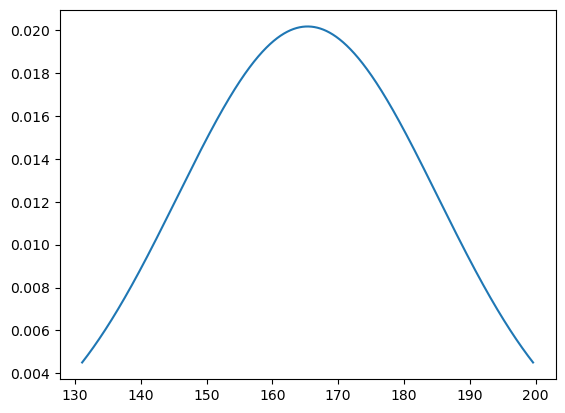

In [30]:
# Normal Distribution

# Plot between min and max with .001 steps. 
x_axis = np.arange(height.min(), height.max(), 0.01) 
  
# Calculating mean and standard deviation 
mean = np.mean(x_axis) #165
sd = np.std(x_axis)  #10
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
plt.show() 

In [34]:
# What percent of woman are shorten than me (171cm)?
norm.cdf(171, mean, std) #71% of women are shorter than me

# What percent of women are taller than 160 cm?
1 - norm.cdf(160, mean, std) #70% of woman are taller than 160cm

# What percent of women are between 160 and 165 cm?
norm.cdf(165, mean, std) - norm.cdf(160, mean, std) #18% of women are between 160-165cm, every 5 or 6 women

0.7126354060859048

In [38]:
# What height are 90% of women shorter than?
norm.ppf(0.9, mean, std) #178 cm

# What height are 90% of women are taller than?
norm.ppf((1-0.9), mean, std) #152cm

178.26100550051424

In [45]:
# Generating/Simulating 10 random numbers
gen10 = norm.rvs(mean, std, size = 30)
gen10

array([174.09155471, 177.56112418, 150.1082502 , 173.3907771 ,
       163.93653533, 152.04905315, 169.17878366, 184.19310115,
       178.40108016, 189.3448132 , 152.90238436, 154.22543877,
       171.25766574, 172.08862315, 154.22889452, 175.46812985,
       174.2967509 , 174.32911741, 170.6946982 , 165.9170043 ,
       144.71301983, 153.26050915, 162.17815846, 175.36550637,
       165.2951458 , 170.2756984 , 158.41458743, 169.1848317 ,
       145.7862434 , 166.2962435 ])

(array([2., 4., 2., 2., 4., 5., 7., 2., 1., 1.]),
 array([144.71301983, 149.17619917, 153.63937851, 158.10255784,
        162.56573718, 167.02891652, 171.49209585, 175.95527519,
        180.41845453, 184.88163387, 189.3448132 ]),
 <BarContainer object of 10 artists>)

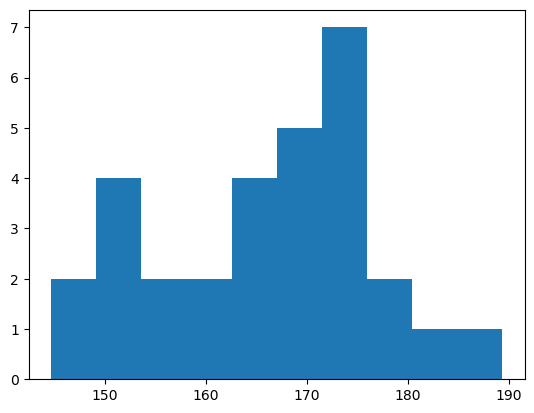

In [46]:
plt.hist(gen10)

# The Central Limit Theorem

In [ ]:
# CLT - the sampling distribution of a statistic becomes closer to
# the normal distribution as the number of trials increases

# !!! ONLY when samples are taken randomly and are independent (with replace) !!!

In [57]:
# Rolling dice 5 times

die = pd.Series([1,2,3,4,5,6]) #'list' object has no attribute 'sample'
samp5 = die.sample(5, replace = True) # Could be same values
samp5.values

print(np.mean(samp5))

3.2


(array([1., 0., 0., 0., 2., 0., 1., 2., 3., 1.]),
 array([2.4 , 2.62, 2.84, 3.06, 3.28, 3.5 , 3.72, 3.94, 4.16, 4.38, 4.6 ]),
 <BarContainer object of 10 artists>)

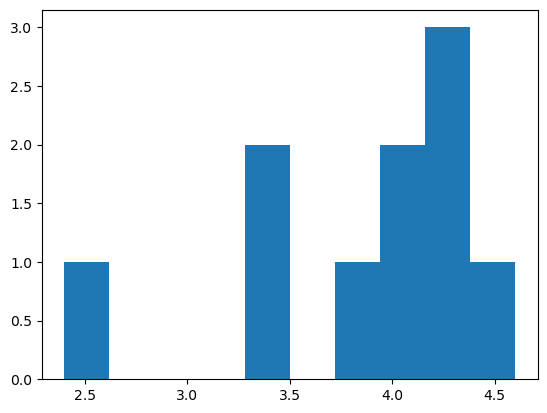

In [60]:
# Rolling dice 5 times 10 repeats
sample_means = []

for i in range(10):
    samp5 = die.sample(5, replace = True)
    sample_means.append(np.mean(samp5))

sample_means
plt.hist(sample_means)

(array([ 13.,  45.,  98., 153., 194., 219., 134.,  79.,  49.,  16.]),
 array([1.4 , 1.82, 2.24, 2.66, 3.08, 3.5 , 3.92, 4.34, 4.76, 5.18, 5.6 ]),
 <BarContainer object of 10 artists>)

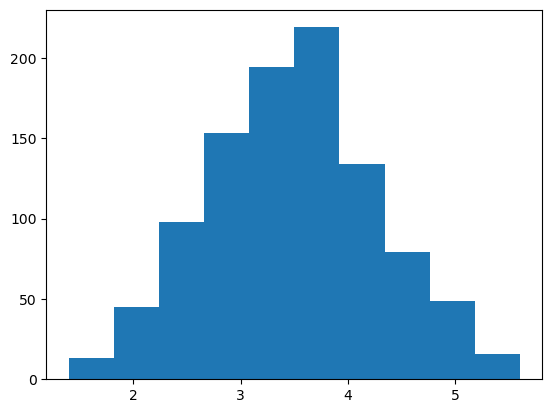

In [62]:
sample_means = []

for i in range(1000):
    samp5 = die.sample(5, replace = True)
    sample_means.append(np.mean(samp5))

sample_means
plt.hist(sample_means)

(array([ 20.,  70.,  48., 166., 135., 203., 155., 118.,  72.,  13.]),
 array([0.4       , 0.60494897, 0.80989795, 1.01484692, 1.2197959 ,
        1.42474487, 1.62969385, 1.83464282, 2.03959179, 2.24454077,
        2.44948974]),
 <BarContainer object of 10 artists>)

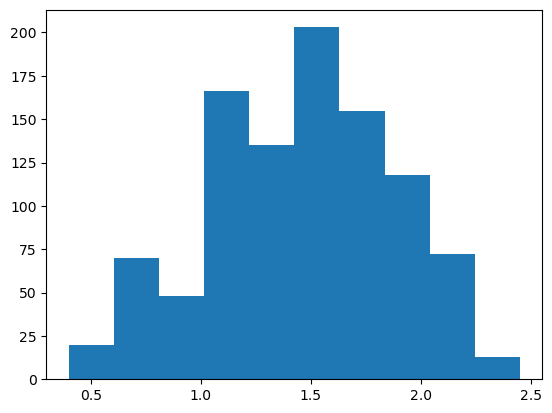

In [69]:
# Standard deviation and CLT

sample_sales = []

for i in range(1000):
    sample_sales.append(np.std(die.sample(5, replace = True)))
    
plt.hist(sample_sales)